Chapter 20  
# Decision Tree
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

## Define visualization function

In [5]:
def train_plot(clf, title_str, X, y):
    
    names = ['Sepal length, x1', 'Sepal width, x2']
    
    # Create color maps for visualization
    rgb = [[255, 238, 255],  # light pink
           [219, 238, 244],  # light blue
           [228, 228, 228]]  # light gray
    rgb = np.array(rgb) / 255.
    
    cmap_light = ListedColormap(rgb)
    cmap_bold = [[255, 51, 0], [0, 153, 255], [138, 138, 138]]
    cmap_bold = np.array(cmap_bold) / 255.
    
    plot_step = 0.02  # mesh grid step size for smooth decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    fig, ax = plt.subplots()
    
    # Predict labels for all grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    # Plot decision boundaries (class separation lines)
    plt.contour(xx, yy, Z, levels=[0, 1, 2], colors=np.array([0, 68, 138]) / 255.)
    
    plt.xlabel(names[0])
    plt.ylabel(names[1])

    # Plot the original training samples
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, 
                    linewidth=1, edgecolor=[1, 1, 1])
    plt.title(title_str)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(np.arange(4, 9, step=1))
    plt.yticks(np.arange(2, 6, step=1))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
    plt.tight_layout()
    plt.axis('scaled')

    # Plot the corresponding decision tree structure
    fig, ax = plt.subplots()
    plot_tree(clf, filled=True,
              feature_names=[names[0], names[1]], 
              rounded=True)
    plt.title(title_str)


## Load the Iris dataset

In [7]:
iris = load_iris()

In [8]:
# Use only the first two features (for 2D visualization)
X = iris.data[:, [0, 1]]
y = iris.target

## Train and visualize decision trees with different numbers of leaf nodes

C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an e

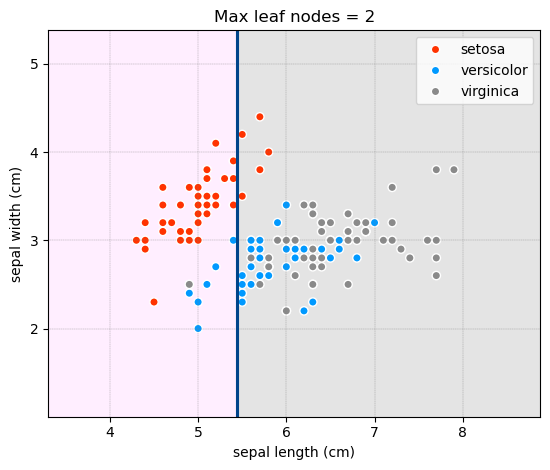

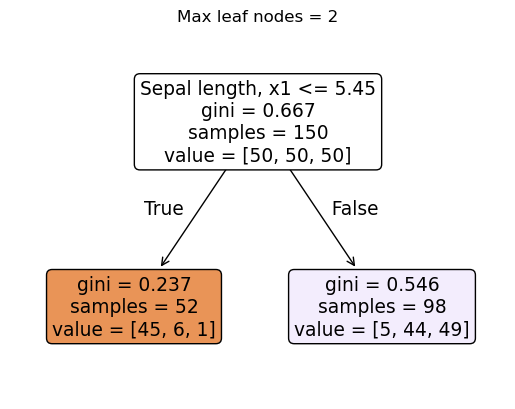

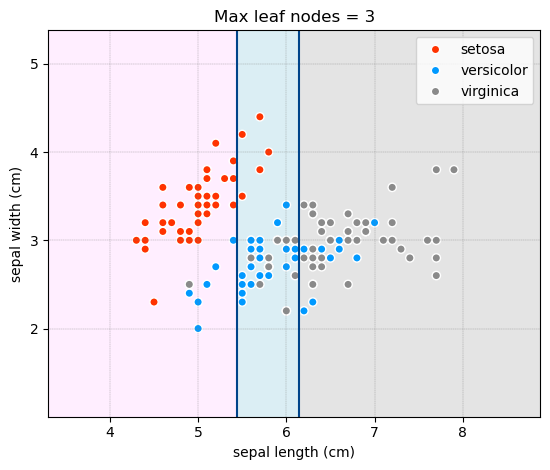

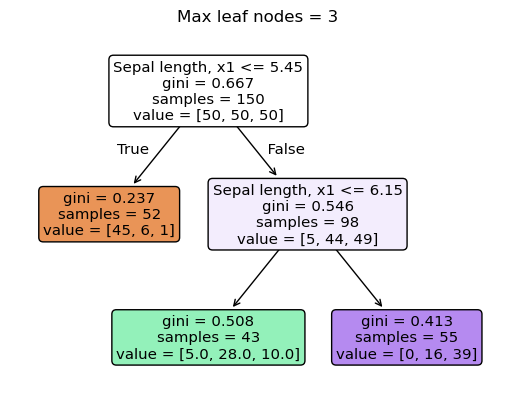

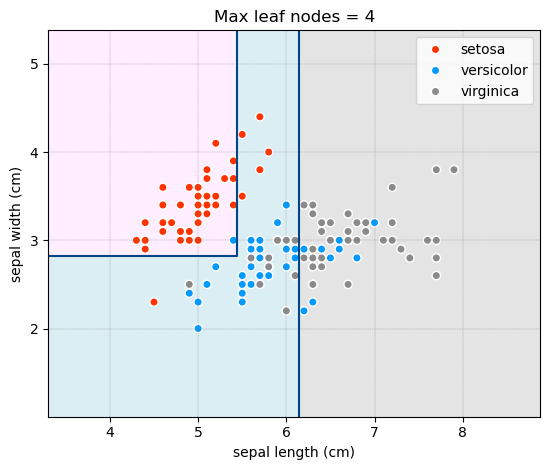

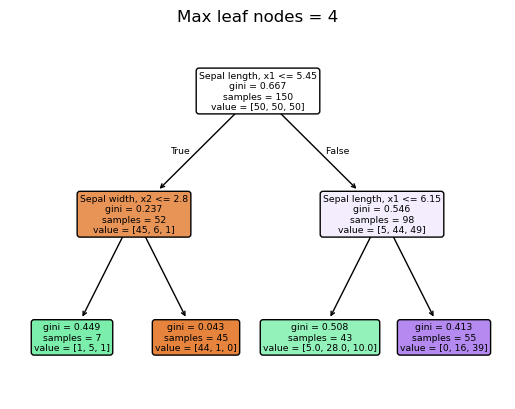

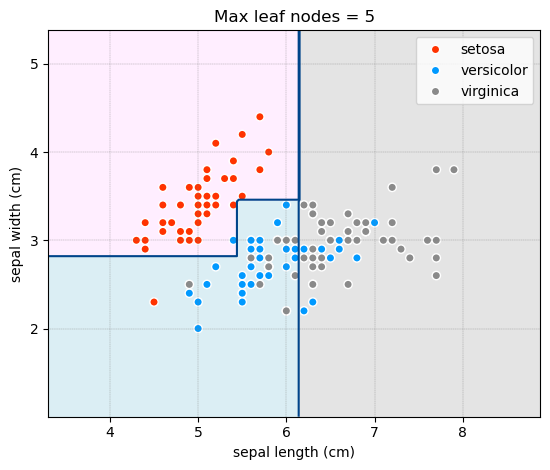

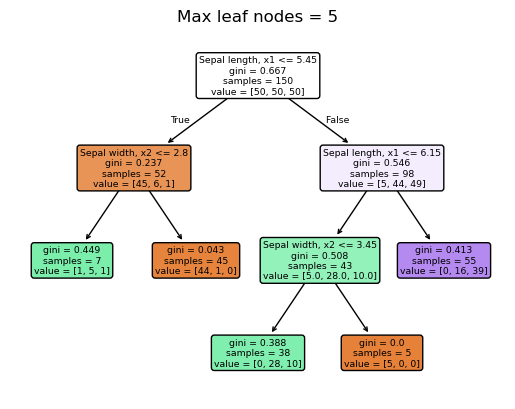

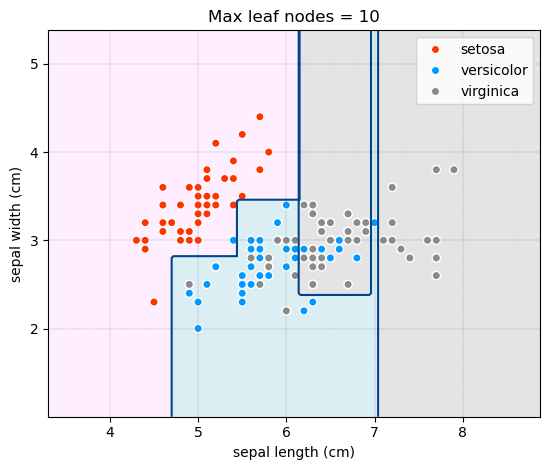

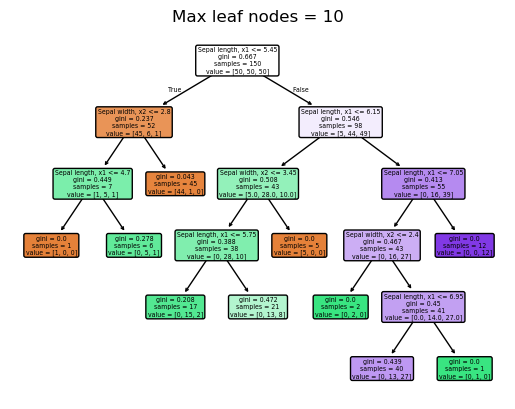

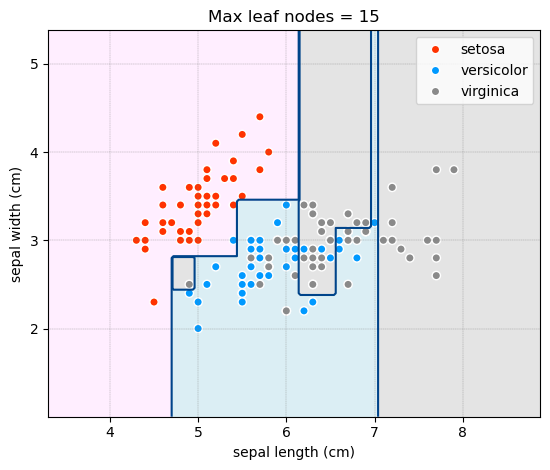

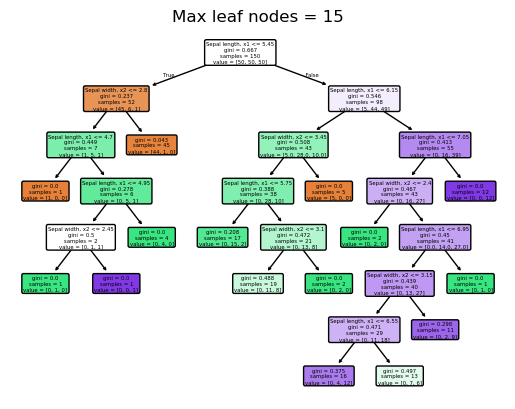

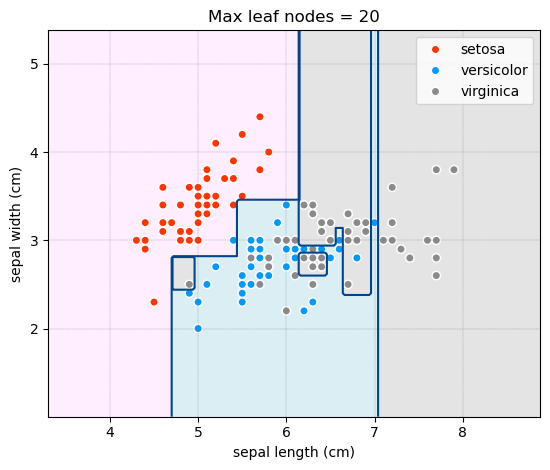

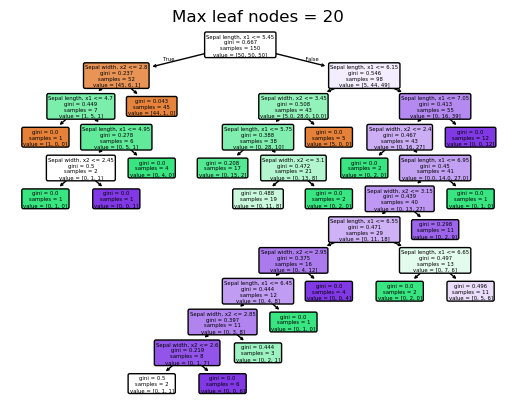

In [10]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes).fit(X, y)
    title_str = "Max leaf nodes = {:.0f}".format(max_leaf_nodes)
    train_plot(clf, title_str, X, y)

## Train and visualize decision trees with different maximum depths

C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
C:\Users\james\AppData\Local\Temp\ipykernel_9424\878281468.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an e

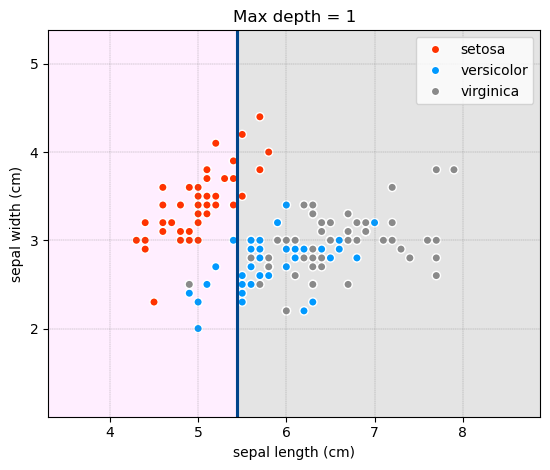

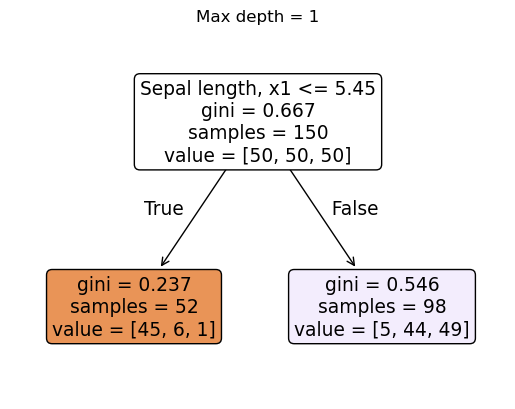

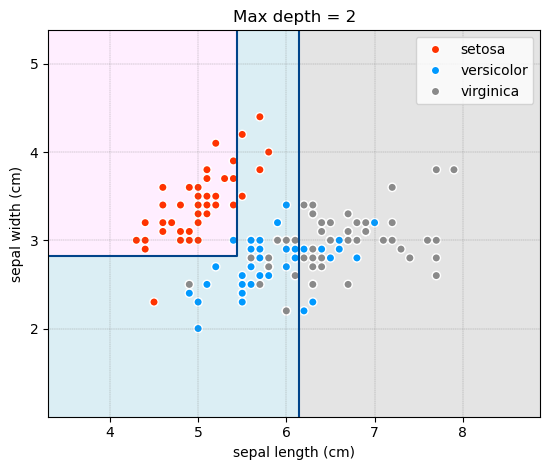

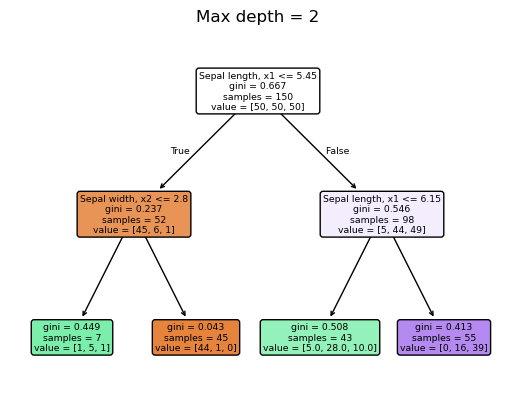

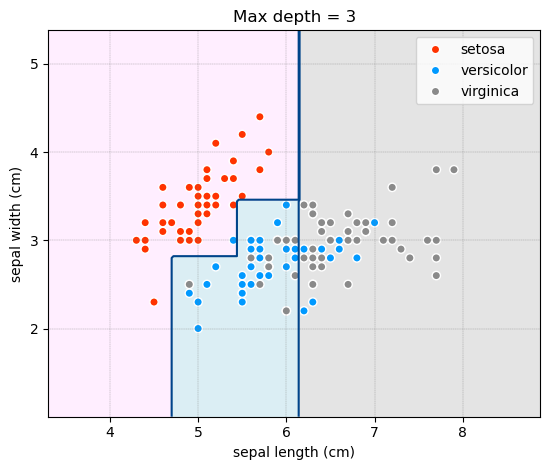

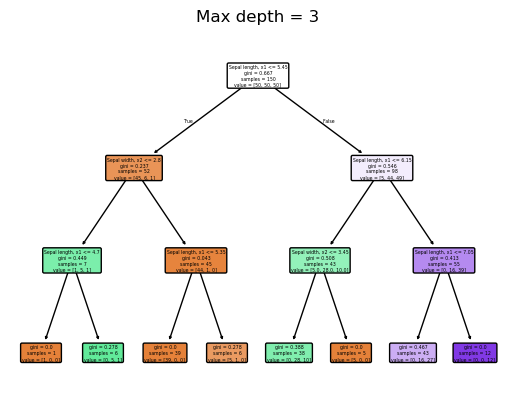

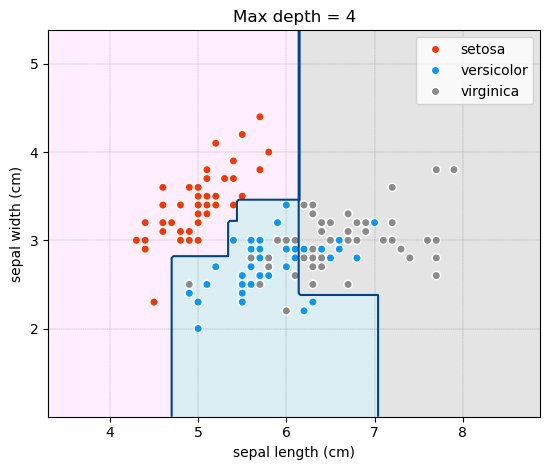

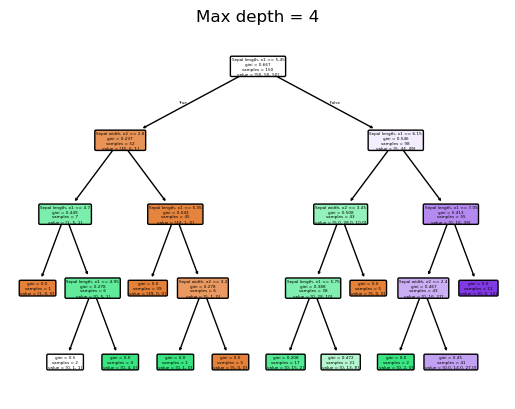

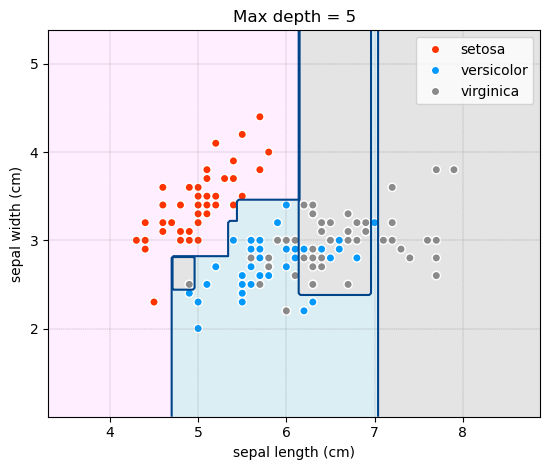

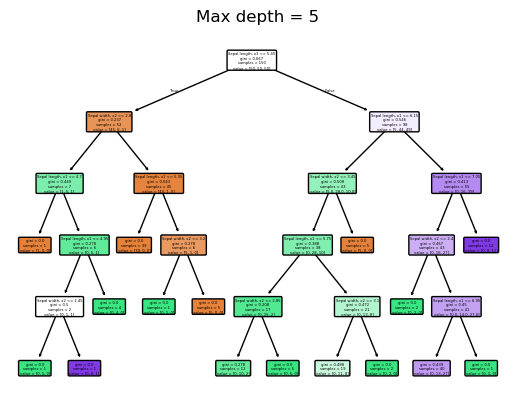

In [12]:
for max_depth in [1, 2, 3, 4, 5]:
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
    title_str = "Max depth = {:.0f}".format(max_depth)
    train_plot(clf, title_str, X, y)